## 다항변수를 생성한 뒤 LinearRegression함수에 적용

In [1]:
#80가지 영양소 평가데이터
import pandas as pd
cereal=pd.read_csv('cereal.csv')

C:\Users\taeeu\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [2]:
# 전처리
cereal=cereal[cereal.columns[3:]]
cereal=cereal[cereal.sugars>0]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
5,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541


In [3]:
#설탕함유량(X)에 따른 영양등급평가(y)를 다항회귀분석으로 예측
import matplotlib.pyplot as plt
cereal2=cereal[['sugars', 'rating']]
cereal2

,sugars,rating
0,6,68.402973
1,8,33.983679
2,5,59.425505
4,8,34.384843
5,10,29.509541
...,...,...
72,3,39.106174
73,12,27.753301
74,3,49.787445
75,3,51.592193


In [4]:
cereal2.sort_values(by=['sugars'], inplace=True)
cereal2

C:\Users\taeeu\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,sugars,rating
11,1,50.764999
16,2,45.863324
61,2,41.998933
50,2,59.642837
75,3,51.592193
...,...,...
52,14,37.840594
6,14,33.174094
70,14,28.592785
30,15,35.252444


In [5]:
cereal2.reset_index(drop=True, inplace=True)
cereal2

,sugars,rating
0,1,50.764999
1,2,45.863324
2,2,41.998933
3,2,59.642837
4,3,51.592193
...,...,...
64,14,37.840594
65,14,33.174094
66,14,28.592785
67,15,35.252444


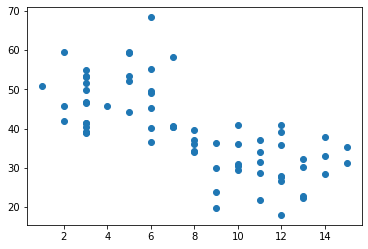

In [6]:
x=cereal2['sugars'].values
y=cereal2['rating'].values
plt.scatter(x,y)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(48,) (21,)
(48,) (21,)


In [8]:
#다항변수 생성
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X_train.reshape(-1,1))

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [9]:
import numpy as np
X_test_poly=poly_reg.transform(X_test.reshape(-1,1))
pred=reg.predict(X_test_poly)

#numpy의 프린트 옵션을 소수점 둘째자리로 맞춤
np.set_printoptions(precision=2)
print(np.concatenate((pred.reshape(len(pred), 1), y_test.reshape(len(y_test),1)),1))

[[31.03 32.21]
 [42.14 40.45]
 [43.92 49.51]
 [40.34 33.98]
 [29.11 33.17]
 [36.67 31.07]
 [40.34 36.19]
 [32.93 18.04]
 [34.81 37.14]
 [50.85 42.  ]
 [40.34 37.04]
 [34.81 31.44]
 [40.34 39.7 ]
 [32.93 39.26]
 [43.92 36.52]
 [31.03 22.74]
 [34.81 28.74]
 [34.81 21.87]
 [36.67 40.92]
 [36.67 29.51]
 [42.14 40.69]]


In [10]:
#모델 예측력 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test, pred)
#(실제값, 예측값)
mae=mean_absolute_error(y_test,pred)
rmse=np.sqrt(mse)
acc=reg.score(poly_reg.transform(X_test.reshape(-1,1)),y_test)

In [11]:
print(mse)
print(mae)
print(rmse)
print(acc)

43.25972054783456
5.518165997839317
6.577212217028926
0.18995765413837562


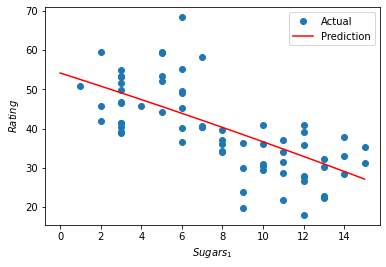

In [12]:
X_new=np.linspace(0,15,100).reshape(100,1)
X_new_poly=poly_reg.transform(X_new)
y_new=reg.predict(X_new_poly)

plt.plot(x,y,'o',label='Actual')
plt.plot(X_new, y_new, 'r-', label="Prediction")
plt.legend(loc='upper right')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Rating$')
plt.show()

## 고차다항회귀분석

In [29]:
import pandas as pd
cereal=pd.read_csv('cereal.csv')
cereal=cereal[cereal.columns[3:]]
#cereal=cereal[cereal.sugars>0]
#cereal.head()

In [30]:
X=cereal.iloc[:,:-1].values
y=cereal.iloc[:,:-1].values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53, 12) (24, 12) (53, 12) (24, 12)


In [32]:
#전철
from sklearn.preprocessing import StandardScaler
Stand=StandardScaler()
X_train=Stand.fit_transform(X_train)
X_test=Stand.transform(X_test)

from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)

from sklearn.linear_model import LinearRegression
X_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

reg=LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [33]:
pred=reg.predict(X_test_poly)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test, pred)
#(실제값, 예측값)
mae=mean_absolute_error(y_test,pred)
rmse=np.sqrt(mse)